## IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
#from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff,create_report
from tqdm import tqdm
sns.set_theme(style="darkgrid")

In [4]:
#! to check the size of the data set
!ls -GFlash ./DataSet/shopping_behavior_updated.csv

408K -rw-r--r-- 1 ACER 407K Oct 19 13:36 ./DataSet/shopping_behavior_updated.csv


## Load dataset

In [3]:
#! to check how long the data takes to read  
# %%timeit
df_shopping_behavior = pd.read_csv("./DataSet/shopping_behavior_updated.csv")

In [4]:
df_shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Checking Data for missing informations

In [7]:
# this will show all the columns that have missing data 
#? df_shopping_behavior.isna().sum()

## Description of the Shopping Behaviour/Trends

In [8]:
df_shopping_behavior.info()
# To Convert DataType
#? df_shopping_behavior["Size"].astype("int")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# DATA NORMALIZATION
Several approaches for normalization
- 1 simle feature scaling $$ x_{new}=\frac{x_{old}}{x_{max}} $$ $$df["length"]=\frac{df["length"]}{df["length"].max()}$$

---------------------------------------------------------------------------------------------------------------------------------------
- 2 Min-Max $$ x_{new}=\frac{x_{old}-x_{min}}{x_{max}-x_{min}} $$ $$ df["length"]= \frac{df["length"]-df["length"].min()}{df["length"].max()-df["length"].min()}$$

---------------------------------------------------------------------------------------------------------------------------------------
- 3 Z-score $$ x_{new}=\frac{x_{old}-\mu}{\sigma} $$ $$ df["length"]= \frac{df["length"]-df["length"].mean()}{df["length"].std()}$$

In [5]:
df_shopping_behavior.describe(include="all")
# To change the name of the Column from Size to Sizes 
#? df_shopping_behavior.rename(columns={"Size":"Sizes"},inplace=True)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


# BINNING

bins=np.linspace(min(df["price"]),max(df["price"]),4)

group_name=["low","medium","high"]

df["price-binned"]=pd.cut( df["price"], bins, labels=group_name, include_lowest=True )

# ONE-HOT ENCODING
pd.get_dummies(df["fule"])

In [12]:
bins=np.linspace(min(df_shopping_behavior["Age"]),max(df_shopping_behavior["Age"]),6)
group_name=["0-30","30-40","40-50","50-60","60-100"]
df_shopping_behavior["Age-binned"]=pd.cut( df_shopping_behavior["Age"], bins, labels=group_name, include_lowest=True )

In [14]:
df_shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age-binned
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-30
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50


In [17]:
#sns.histplot(df_shopping_behavior["Age"])

EXPLORATORY DATA ANALYSIS (EDA) 

- Preliminary steps in data analysis to:
  - Summarize main characteristics of the data
  - Gain better understanding of the data set
  - Uncover relationship between variables
  - Extract important variables

---------------------------------------------------------------------------------------------------------------------------------------

- Question:
  - "what are the charactestics which have the most impact on price"
  - 

# Descriptive Statistics

- Describe basic features of data
- Gives short summaries about the sample and measures of the data
- we can use libraries like { dataprep, pandas-profiling, sweetviz, df.describe("include="all""), value_count(),  }
- 

In [25]:
category=df_shopping_behavior["Category"].value_counts().to_frame()
#sns.histplot(category)
category

,Category
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [49]:

#! Function to count each catogry
def counts(_df,_column):
    return _df[_column].value_counts().to_frame()


In [50]:
counts(df_shopping_behavior,"Item Purchased").head()

,Item Purchased
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


In [27]:
item_purchased=df_shopping_behavior["Item Purchased"].value_counts().to_frame()
#sns.histplot(item_purchased)
item_purchased.head()

,Item Purchased
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


In [30]:
size=df_shopping_behavior["Size"].value_counts().to_frame()
size

,Size
M,1755
L,1053
S,663
XL,429


In [33]:
location=df_shopping_behavior["Location"].value_counts().to_frame()
location.head()

,Location
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89


In [35]:
color=df_shopping_behavior["Color"].value_counts().to_frame()
color.head()

,Color
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


In [36]:
payment_method=df_shopping_behavior["Payment Method"].value_counts().to_frame()
payment_method

,Payment Method
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


In [51]:
review_rating=df_shopping_behavior["Review Rating"].value_counts().to_frame()
review_rating.head()

,Review Rating
3.4,182
4.0,181
4.6,174
4.2,171
2.9,170


In [53]:
counts(df_shopping_behavior,"Review Rating").head()

,Review Rating
3.4,182
4.0,181
4.6,174
4.2,171
2.9,170


In [10]:
#sns.pairplot(data=df_shopping_behavior[["Age","Purchase Amount (USD)","Review Rating","Previous Purchases"]])

In [11]:
#sns.relplot(data=df_shopping_behavior, x="Age", y="Purchase Amount (USD)",style="Gender")


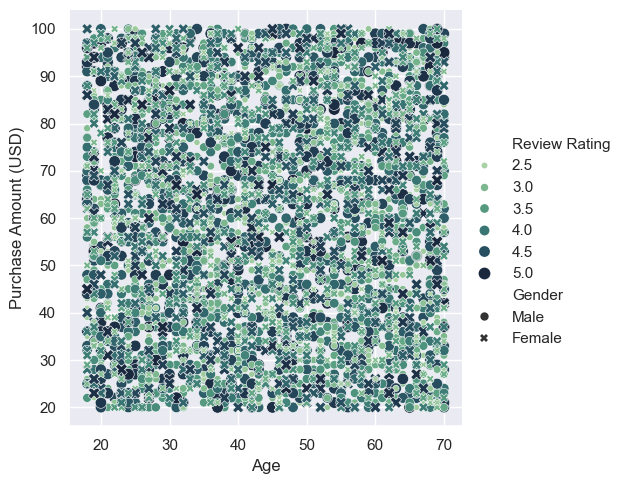

In [12]:
sns.relplot(data=df_shopping_behavior, x="Age", y="Purchase Amount (USD)",style="Gender",hue="Review Rating", palette="ch:r=-.5,l=.75",size="Review Rating")

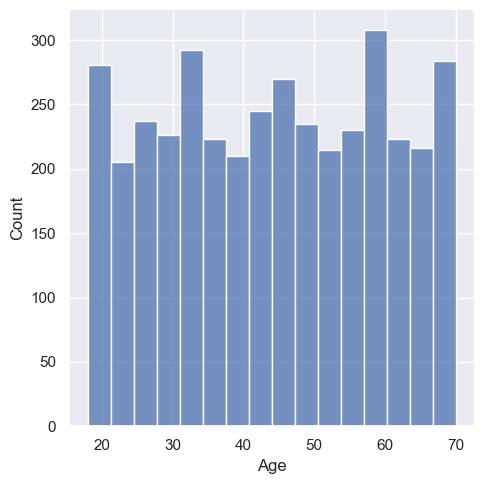

In [13]:
sns.displot(data=df_shopping_behavior,x="Age")

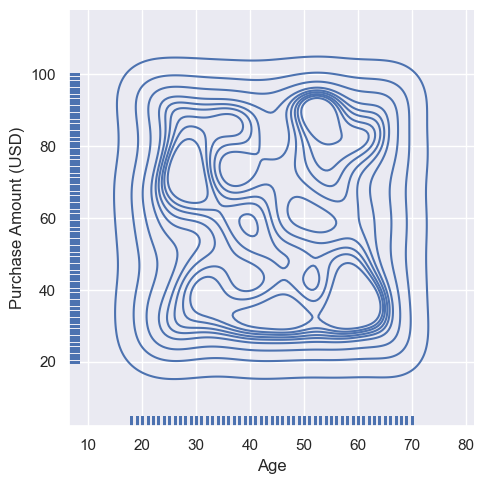

In [14]:
sns.displot(data=df_shopping_behavior,x="Age",y="Purchase Amount (USD)",kind="kde", rug=True)

In [15]:
#sns.jointplot(data=df_shopping_behavior,x="Age",y="Purchase Amount (USD)")

In [16]:
#g = sns.PairGrid(df_shopping_behavior[["Age","Purchase Amount (USD)","Review Rating","Previous Purchases"]]) #
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)

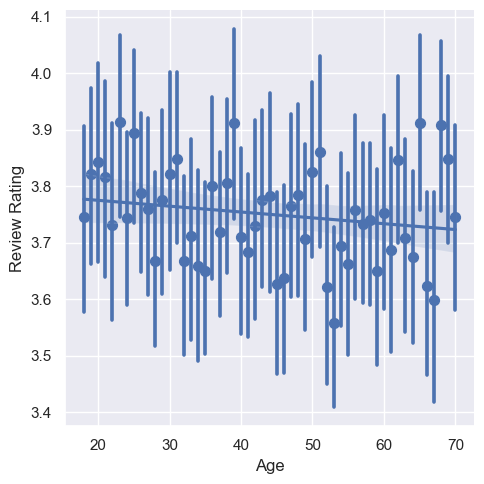

In [17]:
sns.lmplot(x="Age", y="Review Rating", data=df_shopping_behavior, x_estimator=np.mean)

# GROUPING DATA
- Using Pandas DataFrame, `GroupBy()` Method
  - can be applied on categorical variables
  - group data into categories
  - single or multiple variables
  ```py
  df_test = df[["drive-wheel","body-style","price"]]
  df_grp = df_test.groupby(["drive-wheel","body-style"],as_index=False).mean()
  df_grp
  ``` 

# PIVOT TABLE

- One variable displayed along the column and the other variable displayed along the rows.

```py
df_pivot = df_grp.pivot(index="drive-wheel",columns="body-style")
df_pivot
```